<img src="res/itm_logo.jpg" width="500px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2019

En este notebook aplicamos una red Convolutiva neuronal en Keras a un dataset de clasificación.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
mnist = keras.datasets.fashion_mnist

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print(training_images.shape)
print(training_labels.shape)
print("Categorias del dataset: ",np.unique(training_labels))

4431872/4422102 [==============================] - 3s 1us/step
(60000, 28, 28)
(60000,)
('Categorias del dataset: ', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))


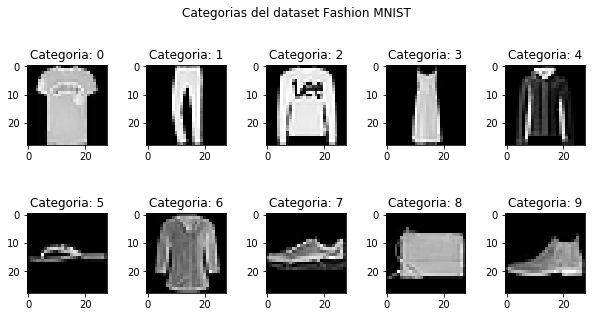

In [5]:
#Despleguemos ejemplos del dataset por categoria

fig = plt.figure(figsize=(10,5))
fig.suptitle("Categorias del dataset Fashion MNIST")
plt.subplots_adjust(wspace=0.5)

for j in range(10): #10 categorias
    for i in range(10000): #60000 ejemplos en el dataset de prueba
        if(test_labels[i] == j):
            plt.subplot(2,5,j+1)
            plt.title("Categoria: "+str(j))
            plt.imshow(test_images[i], cmap='gray')
            break
plt.show()

<hr>

## Convolution

Una convolucion es una operacion que consiste en "aplicar" un filtro $k$ sobre una imagen $I$, donde el filtro $k$ es una matriz de menor tamanio que la imagen $I$. La convolucion se define como:

<br>

<center>
    <font size="5">
        
    $G(x,y) = k * I(x,y) = \sum^{a}_{s=-a}\sum^{b}_{t=-b}{k(s,t)*I(x-s, y-t)}$
   
   </font>
</center>

In [6]:
#k1 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
#k2 = k1.T

k1 = np.random.random([3,3])
k2 = k1.T
print(k1)
print(k2)

[[0.52939402 0.03247945 0.64059886]
 [0.97365002 0.93788251 0.08011639]
 [0.5080782  0.33995747 0.81770474]]
[[0.52939402 0.97365002 0.5080782 ]
 [0.03247945 0.93788251 0.33995747]
 [0.64059886 0.08011639 0.81770474]]


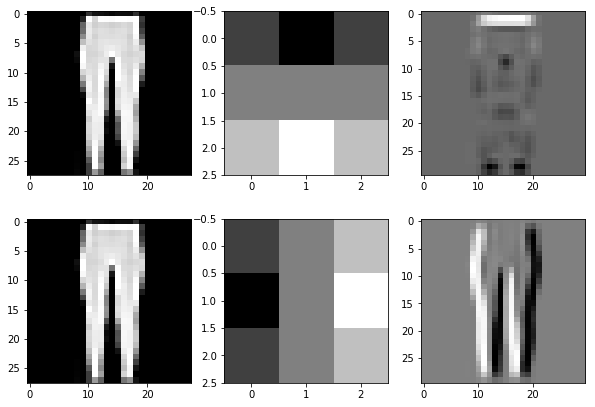

In [7]:
from scipy import signal

#k1 = np.random.random([3,3])
#k2 = k1.T
k1 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
k2 = k1.T

I = training_images[np.random.randint(0,60000)]
G1 = signal.correlate2d(I,k1)
G2 = signal.correlate2d(I,k2)


plt.figure(figsize=(10,7))

plt.subplot(231)
plt.imshow(I, cmap='gray')
plt.subplot(232)
plt.imshow(k1, cmap='gray')
plt.subplot(233)
plt.imshow(G1, cmap='gray')

plt.subplot(234)
plt.imshow(I, cmap='gray')
plt.subplot(235)
plt.imshow(k2, cmap='gray')
plt.subplot(236)
plt.imshow(G2, cmap='gray')

plt.show()

Si finalmente los valores de los filtros $k$ son reales, una red neuronal podria aprenderlos como los pesos $W$ de una capa Dense. El objetivo de la convolucion dentro de una red neuronal consiste en FRACCIONAR la imagen en sus partes constituyentes y aprender QUE elementos hacen que un objeto sea de una u otra categoria.


<img src="https://adeshpande3.github.io/assets/Cover.png">
<center> Tomada de: https://adeshpande3.github.io/assets/Cover.png</center>

## Max Pooling

Esta operacion tiene como objetivo reducir el tamanio de la senial a traves de la red neuronal de tal forma que las ultimas capas reciban una version de menor tamanio de la senial de las capas anteriores. De esta forma, se reduce el costo computacional del proceso de entrenamiento.

In [8]:
def maxpooling(I, kernel_size):
    M, N = I.shape
    K = kernel_size #tamanio del pooling

    MK = M // K
    NL = N // K

    G = I[:MK*K, :NL*K].reshape(MK, K, NL, K).max(axis=(1, 3)) #maxpooling
    
    return G

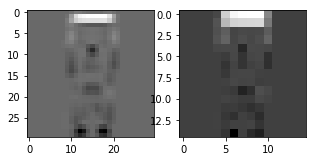

In [9]:
max_G1 = maxpooling(G1, 2)

plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(G1, cmap='gray')

plt.subplot(122)
plt.imshow(max_G1, cmap='gray')
plt.show()

<hr>

## Implementemos una red convolutiva en Keras

In [7]:
model = keras.Sequential()

model.add(keras.layers.Convolution2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1))) #capa convolutiva
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [8]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print(training_images.shape)
print(training_labels.shape)
print("Categorias del dataset: ",np.unique(training_labels))


training_images =  training_images / 255.0
test_images = test_images / 255.0

training_images = training_images.reshape(60000,28, 28,1) #requerimiento de Keras para las convoluciones: 4D
test_images = test_images.reshape(10000,28, 28,1)

(60000, 28, 28)
(60000,)
('Categorias del dataset: ', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'mae'])

history = model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 97s 2ms/step - loss: 0.4003 - acc: 0.8574 - mean_absolute_error: 4.4200
Epoch 2/5
60000/60000 [==============================] - 100s 2ms/step - loss: 0.2729 - acc: 0.9007 - mean_absolute_error: 4.4200
Epoch 3/5
60000/60000 [==============================] - 82s 1ms/step - loss: 0.2295 - acc: 0.9148 - mean_absolute_error: 4.4200
Epoch 4/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1956 - acc: 0.9286 - mean_absolute_error: 4.4200
Epoch 5/5
10000/10000 [==============================] - 5s 479us/step


[0.2563749175131321, 0.9121, 4.420000081634521]

<hr>

## Trabajemos

1. Intenta editar las convoluciones. Cambiar las 32 a 16 o 64. Que impacto tiene esto en el tiempo de entrenamiento y la precision del modelo?.
2. Agregar una segunda capa de convolucion y una de maxpooling. Que impacto tiene esto en el tiempo de entrenamiento y la precision del modelo?

5


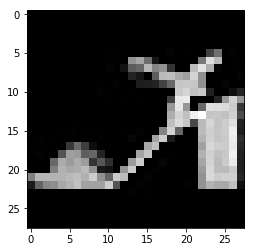

In [77]:
index = 7201

print(test_labels[index])
plt.imshow(test_images[index].reshape(28,28), cmap='gray')
plt.show()

In [78]:
pred = model.predict(test_images[index].reshape(1,28,28,1))
print(np.argmax(pred))

5


In [55]:
print(test_images[index].shape)

(28, 28, 1)
